<a href="https://colab.research.google.com/github/Mohbad88/tp_middleware/blob/main/MiniProjet_IA_G%C3%A9n%C3%A9ratives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Membres du groupe :**

*   ATAOU Mohamed Farouk
*   BOUGUENA Yasmine
*   COULIBALY Ibrahima









In [ ]:
import torch
import torch.nn as nn
print(torch.__version__)
print(torch.cuda.is_available())


2.2.1+cu121
False


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torchvision

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision.utils import save_image
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.autograd import Variable

**Telechargement du Dataset MNIST**

In [ ]:

# Transformation des données pour les normaliser
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertit les images en tenseurs
    transforms.Normalize((0.5,), (0.5,))  # Normalisation des valeurs des pixels entre -1 et 1
])

# Téléchargement du dataset MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Création des DataLoader pour itérer sur les données par batch
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 66753868.68it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 49003112.39it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 21576963.19it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13220353.07it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



 Implementation of Autoencoder

Epoch [1/10], Batch [100/469], Loss: 0.2847
Epoch [1/10], Batch [200/469], Loss: 0.0465
Epoch [1/10], Batch [300/469], Loss: 0.0250
Epoch [1/10], Batch [400/469], Loss: 0.0178
Epoch [2/10], Batch [100/469], Loss: 0.0122
Epoch [2/10], Batch [200/469], Loss: 0.0107
Epoch [2/10], Batch [300/469], Loss: 0.0096
Epoch [2/10], Batch [400/469], Loss: 0.0089
Epoch [3/10], Batch [100/469], Loss: 0.0079
Epoch [3/10], Batch [200/469], Loss: 0.0074
Epoch [3/10], Batch [300/469], Loss: 0.0070
Epoch [3/10], Batch [400/469], Loss: 0.0067
Epoch [4/10], Batch [100/469], Loss: 0.0063
Epoch [4/10], Batch [200/469], Loss: 0.0060
Epoch [4/10], Batch [300/469], Loss: 0.0059
Epoch [4/10], Batch [400/469], Loss: 0.0056
Epoch [5/10], Batch [100/469], Loss: 0.0052
Epoch [5/10], Batch [200/469], Loss: 0.0049
Epoch [5/10], Batch [300/469], Loss: 0.0047
Epoch [5/10], Batch [400/469], Loss: 0.0046
Epoch [6/10], Batch [100/469], Loss: 0.0045
Epoch [6/10], Batch [200/469], Loss: 0.0044
Epoch [6/10], Batch [300/469], L

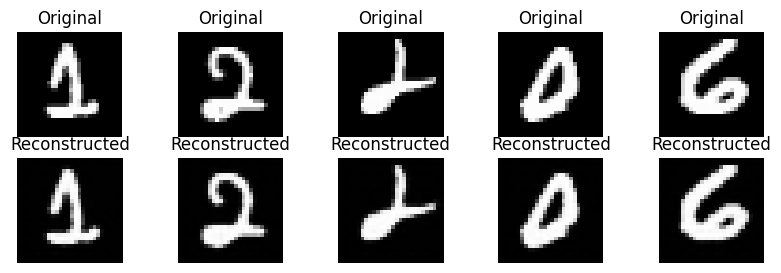

In [ ]:


# Chargement des données MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(16, 8, 3, stride=2, padding=1),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Fonction d'entraînement pour l'autoencodeur
def train_autoencoder(model, optimizer, criterion, train_loader, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for batch_idx, (data, _) in enumerate(train_loader):
            optimizer.zero_grad()
            recon_data = model(data)
            loss = criterion(recon_data, data)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if batch_idx % 100 == 99:
                print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
                running_loss = 0.0

# Instanciation du modèle Autoencodeur
autoencoder = Autoencoder()

# Chargement des données dans un DataLoader
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

# Choix de l'optimizer et de la fonction de perte
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

# Entraînement du modèle Autoencodeur
train_autoencoder(autoencoder, optimizer, criterion, train_loader)

# Génération d'images avec l'autoencodeur
sample_images, _ = next(iter(train_loader))
with torch.no_grad():
    reconstructed_images = autoencoder(sample_images)

# Affichage des images originales et reconstruites
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_images[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


**Implementation modele GAN**

Epoch [1/3], Step [100/469], Generator Loss: 1.3742, Discriminator Loss: 1.1586
Epoch [1/3], Step [200/469], Generator Loss: 0.7059, Discriminator Loss: 1.2355
Epoch [1/3], Step [300/469], Generator Loss: 1.8422, Discriminator Loss: 0.8016
Epoch [1/3], Step [400/469], Generator Loss: 2.7448, Discriminator Loss: 0.3525
Epoch [2/3], Step [100/469], Generator Loss: 1.8649, Discriminator Loss: 0.5665
Epoch [2/3], Step [200/469], Generator Loss: 0.6727, Discriminator Loss: 0.9357
Epoch [2/3], Step [300/469], Generator Loss: 1.6980, Discriminator Loss: 0.6005
Epoch [2/3], Step [400/469], Generator Loss: 1.2002, Discriminator Loss: 0.9672
Epoch [3/3], Step [100/469], Generator Loss: 2.1791, Discriminator Loss: 0.8215
Epoch [3/3], Step [200/469], Generator Loss: 3.2098, Discriminator Loss: 0.4602
Epoch [3/3], Step [300/469], Generator Loss: 0.9131, Discriminator Loss: 0.6341
Epoch [3/3], Step [400/469], Generator Loss: 3.8099, Discriminator Loss: 0.6070


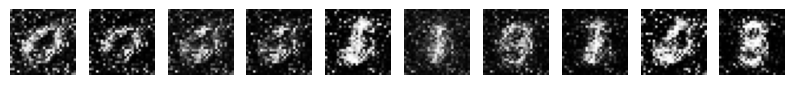

In [ ]:

# Définition du générateur du GAN
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Définition du discriminateur du GAN
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.model(img_flat)

# Initialisation des modèles du GAN
generator = Generator()
discriminator = Discriminator()

# Définition des fonctions de perte et des optimiseurs
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Entraînement du GAN
num_epochs = 3
for epoch in range(num_epochs):
    for i, (real_imgs, _) in enumerate(train_loader):
        batch_size = real_imgs.size(0)

        # Entraînement du discriminateur
        optimizer_D.zero_grad()
        real_imgs = real_imgs.cuda() if torch.cuda.is_available() else real_imgs
        real_labels = torch.ones(batch_size, 1).cuda() if torch.cuda.is_available() else torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1).cuda() if torch.cuda.is_available() else torch.zeros(batch_size, 1)

        # Généreration des images aléatoires
        z = torch.randn(batch_size, 100).cuda() if torch.cuda.is_available() else torch.randn(batch_size, 100)
        fake_imgs = generator(z)

        # Calcul des pertes du discriminateur
        real_pred = discriminator(real_imgs)
        fake_pred = discriminator(fake_imgs.detach())
        d_loss_real = criterion(real_pred, real_labels)
        d_loss_fake = criterion(fake_pred, fake_labels)
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Entraînement du générateur
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, 100).cuda() if torch.cuda.is_available() else torch.randn(batch_size, 100)
        fake_imgs = generator(z)
        fake_pred = discriminator(fake_imgs)
        g_loss = criterion(fake_pred, real_labels)
        g_loss.backward()
        optimizer_G.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Generator Loss: {g_loss.item():.4f}, Discriminator Loss: {d_loss.item():.4f}')

# Affichage d'images générées par le générateur
num_samples = 10
z = torch.randn(num_samples, 100).cuda() if torch.cuda.is_available() else torch.randn(num_samples, 100)
fake_imgs = generator(z)
fake_imgs = fake_imgs.view(fake_imgs.size(0), 28, 28).cpu().detach().numpy()

plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(fake_imgs[i], cmap='gray')
    plt.axis('off')
plt.show()


***Intrepretation des resulats*** :
L'autoencodeur et le GAN offrent des approches distinctes pour la génération d'images et génèrent aussi des images très proches des images d'entrées . Le GAN génère de nouvelles images à partir d'une distribution de bruit latente. Étant donné que le générateur et le discriminateur sont entraînés de manière antagoniste, le générateur apprend à produire des images réalistes qui sont de qualité visuelle.D'autre part, le GAN atteint une perte décroissante pour le générateur, mais la perte du discriminateur peut fluctuer davantage, ce qui peut indiquer une instabilité dans l'apprentissage. En ce qui concerne l'autoencodeur, il est généralement bon pour reproduire les caractéristiques des données d'origine car il minimise directement la différence entre les images d'entrée et les images reconstruites. l'autoencodeur atteint une perte décroissante au fil des époques, ce qui indique qu'il apprend à reconstruire les images d'entrée avec une bonne précision.  En fin de compte, le choix entre un autoencodeur et un GAN dépendra des besoins spécifiques de la tâche et des préférences en matière de qualité visuelle et de stabilité d'apprentissage.

**Affichage des images intermédiaires permettant de passer d'une image à une autre en  utilisant l'autoencoder avec le dataset MNIST**

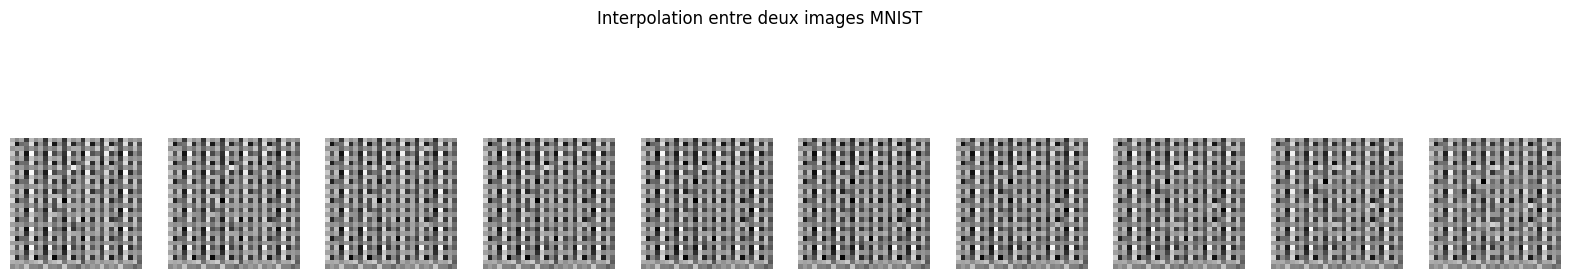

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn

# Définition de l'autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(16, 8, 3, stride=2, padding=1),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialisation de l'autoencoder
autoencoder = Autoencoder()

# Fonction pour interpoler entre deux vecteurs dans l'espace latent
def interpolate_vectors(vect1, vect2, num_steps=10):
    interpolated_vectors = []
    for alpha in np.linspace(0, 1, num_steps):
        interpolated_vect = vect1 * (1 - alpha) + vect2 * alpha
        interpolated_vectors.append(interpolated_vect)
    return interpolated_vectors

# Fonction pour générer les images à partir des vecteurs intermédiaires
def generate_intermediate_images(decoder, interpolated_vectors):
    images = []
    for vect in interpolated_vectors:
        img = decoder(vect.unsqueeze(0))
        images.append(img.squeeze().cpu().detach().numpy())
    return images

# Fonction pour afficher les images
def plot_images(images, title="Interpolation"):
    plt.figure(figsize=(20, 4))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Chargement du dataset MNIST et sélection des images de départ et d'arrivée
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_loader = DataLoader(mnist_dataset, batch_size=len(mnist_dataset), shuffle=True)
images, _ = next(iter(mnist_loader))
image_start = images[0]  # Sélection d'une image de départ
image_end = images[1]  # Sélection d'une image d'arrivée

# Encodage des images de départ et d'arrivée
with torch.no_grad():
    vector_start = autoencoder.encoder(image_start.unsqueeze(0))
    vector_end = autoencoder.encoder(image_end.unsqueeze(0))

# Génération des vecteurs intermédiaires
interpolated_vectors = interpolate_vectors(vector_start.squeeze(), vector_end.squeeze(), num_steps=10)

# Génération et affichage des images intermédiaires
intermediate_images = generate_intermediate_images(autoencoder.decoder, interpolated_vectors)
plot_images(intermediate_images, title="Interpolation entre deux images MNIST")


**Bonus** : Modele de diffusion


Epoch [1/10], Batch [100/469], Loss: 0.0565
Epoch [1/10], Batch [200/469], Loss: 0.0088
Epoch [1/10], Batch [300/469], Loss: 0.0050
Epoch [1/10], Batch [400/469], Loss: 0.0037
Epoch [2/10], Batch [100/469], Loss: 0.0026
Epoch [2/10], Batch [200/469], Loss: 0.0023
Epoch [2/10], Batch [300/469], Loss: 0.0020
Epoch [2/10], Batch [400/469], Loss: 0.0018
Epoch [3/10], Batch [100/469], Loss: 0.0016
Epoch [3/10], Batch [200/469], Loss: 0.0015
Epoch [3/10], Batch [300/469], Loss: 0.0014
Epoch [3/10], Batch [400/469], Loss: 0.0014
Epoch [4/10], Batch [100/469], Loss: 0.0013
Epoch [4/10], Batch [200/469], Loss: 0.0012
Epoch [4/10], Batch [300/469], Loss: 0.0012
Epoch [4/10], Batch [400/469], Loss: 0.0012
Epoch [5/10], Batch [100/469], Loss: 0.0011
Epoch [5/10], Batch [200/469], Loss: 0.0011
Epoch [5/10], Batch [300/469], Loss: 0.0010
Epoch [5/10], Batch [400/469], Loss: 0.0010
Epoch [6/10], Batch [100/469], Loss: 0.0010
Epoch [6/10], Batch [200/469], Loss: 0.0009
Epoch [6/10], Batch [300/469], L

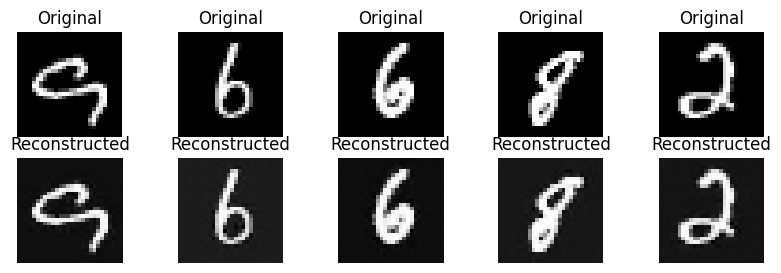

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Chargez les données MNIST
transform = ToTensor()
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

# Créez un DataLoader pour les données
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Définissez la structure de votre modèle de diffusion
class DiffusionModel(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DiffusionModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(out_channels, out_channels, 3, stride=2, padding=1),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(out_channels, out_channels, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(out_channels, in_channels, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instanciez le modèle de diffusion
diffusion_model = DiffusionModel(1, 16)

# Définissez la fonction d'entraînement pour le modèle
def train_diffusion_model(model, train_loader, optimizer, criterion, epochs=10):
    for epoch in range(epochs):
        running_loss = 0.0
        for batch_idx, (data, _) in enumerate(train_loader):
            optimizer.zero_grad()
            recon_data = model(data)
            loss = criterion(recon_data, data)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if batch_idx % 100 == 99:
                print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
                running_loss = 0.0

# Instanciez l'optimiseur et la fonction de perte
optimizer = optim.Adam(diffusion_model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Entraînez le modèle
train_diffusion_model(diffusion_model, train_loader, optimizer, criterion)

# Générez des images à partir du modèle
sample_images, _ = next(iter(train_loader))
with torch.no_grad():
    reconstructed_images = diffusion_model(sample_images)

# Affichez les images originales et reconstruites
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_images[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

